# Travelling Salesman Problem

In [1]:
import mlrose_hiive
import numpy as np
import time
import matplotlib.pyplot as plt

References
* [mlrose tutorial](https://github.com/gkhayes/mlrose/blob/master/tutorial_examples.ipynb)
* [mlrose documentation](https://mlrose.readthedocs.io/en/stable/)

In [2]:
problem = mlrose_hiive.TSPGenerator.generate(seed=0, number_of_cities=15)

In [6]:
def find_best_runs(df_run_curves):
    best_fitness = df_run_curves['Fitness'].min()
    best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
    print(best_runs)

def fitness_curve(curve, title):
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.title(title)
    length = len(curve)
    y = "Fitness"
    plt.plot(range(length), curve, label="Fitness", lw=2)
    plt.legend(loc="best")
    plt.show()

In [4]:
rhc = mlrose_hiive.RHCRunner(problem=problem,
                experiment_name="RHC on TSP",
                seed=0,
                iteration_list=[512],
                max_attempts=300,
                restart_list=[25, 75, 100])   

df_run_stats, df_run_curves = rhc.run()
find_best_runs(df_run_curves)

        Iteration      Time     Fitness   FEvals  Restarts  max_iters  \
28611         328  0.039293  884.091105  16080.0        75        512   
28612         329  0.039408  884.091105  16081.0        75        512   
28613         330  0.039558  884.091105  16082.0        75        512   
28614         331  0.039720  884.091105  16083.0        75        512   
28615         332  0.039861  884.091105  16084.0        75        512   
...           ...       ...         ...      ...       ...        ...   
101057        508  0.064701  884.091105  51842.0       100        512   
101058        509  0.064834  884.091105  51843.0       100        512   
101059        510  0.064969  884.091105  51844.0       100        512   
101060        511  0.065149  884.091105  51845.0       100        512   
101061        512  0.065298  884.091105  51846.0       100        512   

        current_restart  
28611                30  
28612                30  
28613                30  
28614              

In [5]:
st = time.time()
best_state, best_fitness, rhc_curve = mlrose_hiive.random_hill_climb(problem,
                                                         max_attempts=300,
                                                         max_iters=512,
                                                         random_state=0,
                                                         restarts=75,
                                                         curve=True)
et = time.time()

rhc_wc_time = et - st
print("Time for RHC CPP: ", rhc_wc_time)

Time for RHC CPP:  0.8217120170593262


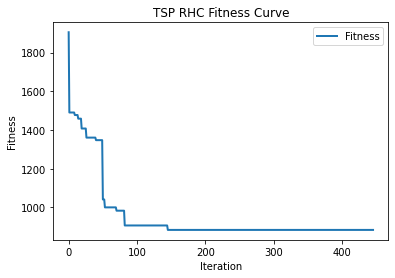

In [10]:
fitness_curve(rhc_curve[:, 0], "TSP RHC Fitness Curve")

In [12]:
sa = mlrose_hiive.SARunner(problem=problem,
                  experiment_name="SA on TSP",
                  seed=0,
                  iteration_list=[512],
                  max_attempts=300,
                  temperature_list=[100, 200],
                  decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay])

df_run_stats_sa, df_run_curves_sa = sa.run()
find_best_runs(df_run_curves_sa)

      Iteration      Time     Fitness  FEvals Temperature  max_iters
926         413  0.044167  884.091105   494.0         100        512
927         414  0.044309  884.091105   495.0         100        512
928         415  0.044451  884.091105   496.0         100        512
929         416  0.044593  884.091105   497.0         100        512
930         417  0.044737  884.091105   498.0         100        512
...         ...       ...         ...     ...         ...        ...
1021        508  0.058179  884.091105   589.0         100        512
1022        509  0.058328  884.091105   590.0         100        512
1023        510  0.058477  884.091105   591.0         100        512
1024        511  0.058620  884.091105   592.0         100        512
1025        512  0.058754  884.091105   593.0         100        512

[100 rows x 6 columns]


In [13]:
st = time.time()
best_state, best_fitness, sa_curve = mlrose_hiive.simulated_annealing(problem,
                                                             max_attempts=300,
                                                             max_iters=512,
                                                             random_state=0,
                                                             schedule=mlrose_hiive.GeomDecay(100),
                                                             curve=True)
et = time.time()
sa_wc_time = et - st
print("Time for SA TSP: ", sa_wc_time)

Time for SA TSP:  0.029947757720947266


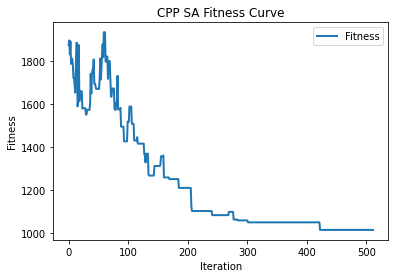

In [14]:
fitness_curve(sa_curve[:,0], "CPP SA Fitness Curve")

In [15]:
ga = mlrose_hiive.GARunner(problem=problem,
                   experiment_name="GA on TSP",
                   seed=0,
                   max_attempts=300,
                   iteration_list=[512],
                   population_sizes=[500, 1000],
                   mutation_rates=[0.1, 0.25, 0.5])
df_run_stats_ga, df_run_curves_ga = ga.run()
find_best_runs(df_run_curves_ga)

      Iteration      Time     Fitness    FEvals  Population Size  \
717          56  1.397843  884.091105   28577.0              500   
718          57  1.421398  884.091105   29078.0              500   
719          58  1.444946  884.091105   29579.0              500   
720          59  1.468346  884.091105   30080.0              500   
721          60  1.491867  884.091105   30581.0              500   
...         ...       ...         ...       ...              ...   
2219        508  4.293965  884.091105  509527.0             1000   
2220        509  4.318754  884.091105  510528.0             1000   
2221        510  4.343481  884.091105  511529.0             1000   
2222        511  4.368377  884.091105  512530.0             1000   
2223        512  4.393404  884.091105  513531.0             1000   

      Mutation Rate  max_iters  
717             0.5        512  
718             0.5        512  
719             0.5        512  
720             0.5        512  
721             0.

In [16]:
st = time.time()
best_state, best_fitness, ga_curve = mlrose_hiive.genetic_alg(problem,
                                                   max_attempts=300,
                                                   max_iters=512,
                                                   random_state=0,
                                                   pop_size=500,
                                                   mutation_prob=0.5,
                                                   curve=True)
et = time.time()
sa_wc_time = et - st
print("Time for GA CPP: ", sa_wc_time)

Time for GA CPP:  8.411242961883545


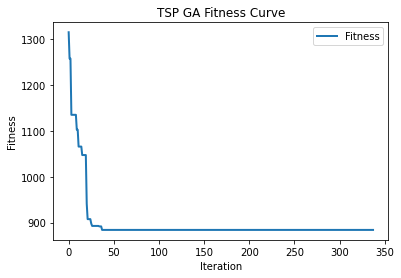

In [17]:
fitness_curve(ga_curve[:,0], "TSP GA Fitness Curve")

In [18]:
mimic = mlrose_hiive.MIMICRunner(problem=problem,
                       experiment_name="FFP MIMIC Fitness Curve",
                       seed=0,
                       population_sizes=[100, 500, 1000],
                       keep_percent_list=[0.05, 0.1, 0.15],
                       iteration_list=[512],
                       max_attempts=300,
                       use_fast_mimic=True)
mimic_stats, mimic_curve = mimic.run()
find_best_runs(mimic_curve)

      Iteration      Time      Fitness    FEvals  use_fast_mimic  \
2130          6  0.264655  1030.101016    7011.0            True   
2131          7  0.304525  1030.101016    8012.0            True   
2132          8  0.343700  1030.101016    9013.0            True   
2133          9  0.382326  1030.101016   10014.0            True   
2134         10  0.421046  1030.101016   11015.0            True   
...         ...       ...          ...       ...             ...   
2426        302  0.001482  1030.101016  303307.0            True   
2427        303  0.034829  1030.101016  304308.0            True   
2428        304  0.067301  1030.101016  305309.0            True   
2429        305  0.098768  1030.101016  306310.0            True   
2430        306  0.137212  1030.101016  307311.0            True   

      Population Size  Keep Percent  max_iters  
2130             1000           0.1        512  
2131             1000           0.1        512  
2132             1000           0.1 

In [19]:
st = time.time()
best_state, best_fitness, mimic_curve = mlrose_hiive.mimic(problem,
                                             max_attempts=300,
                                             max_iters=512,
                                             random_state=0,
                                             pop_size=100,
                                             keep_pct=0.05,
                                             curve=True)
et = time.time()
mimic_wc_time = et - st
print("Time for mimic : ", sa_wc_time)

Time for mimic TSP:  8.411242961883545


12.03774094581604


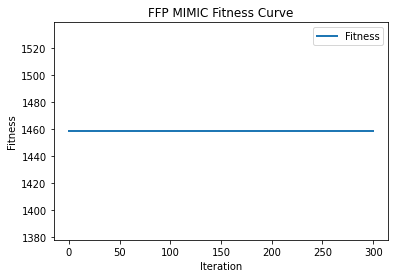

In [23]:
print(mimic_wc_time)
fitness_curve(mimic_curve[:,0], "FFP MIMIC Fitness Curve")

Text(0, 0.5, 'Fitness')

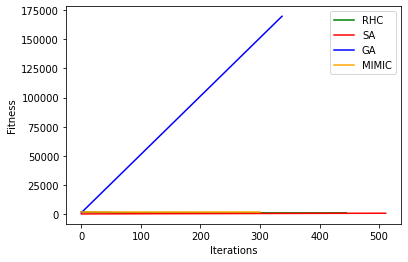

In [21]:
iterations = range(1, 500)
plt.plot(rhc_curve[:, 0], label='RHC', color='green')
plt.plot(sa_curve[:, 1], label='SA', color='red')
plt.plot(ga_curve[:, 1], label='GA', color='blue')
plt.plot(mimic_curve[:, 0], label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Fitness")